In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import datetime as dt
from dateutil.parser import parse

import pickle


## Plot chiller data

In [84]:
Plant = '5T1'

data_file = 'data/'+Plant+'_chiller.csv'
title = Plant

Chiller = pd.read_csv(data_file)

No handles with labels found to put in legend.


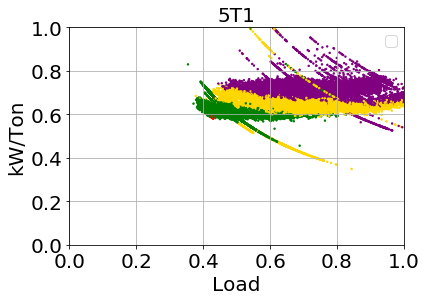

In [85]:
col_list = { 10:'blue',
             20:'red',
             30:'green',
             40:'gold',
             50:'purple'}


def pltcolor(lift,col_list):
    cols=[]
    for l in lift:
        if l <= 15:
            cols.append(col_list[10])
        elif (l > 15) and (l <= 25):
            cols.append(col_list[20])
        elif (l > 25) and (l <= 35):
            cols.append(col_list[30])
        elif (l > 35) and (l <= 45):
            cols.append(col_list[40])
        elif (l > 45):
            cols.append(col_list[50])
    return cols

bands = pltcolor(list(Chiller['DTLift']),col_list)

#Chiller = Chiller[(Chiller['DTLift']> 25) & (Chiller['DTLift']<= 35)]

plt.scatter(x=Chiller['Load'],y=Chiller['kW/Ton'],s=2,c=bands,label='')
plt.legend(fontsize=15)
plt.xlabel('Load',size=20)
plt.ylabel('kW/Ton',size=20)
plt.title(title, size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(True)
plt.ylim(0,1)
plt.xlim(0,1)
plt.show()


In [57]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Chiller['Load'], Chiller['DTLift'],Chiller['kW/Ton'], 
               zdir='z', s=1, depthshade=True, c=bands)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x111aeeea0> (for post_execute):


ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (36340,4) and requested shape (36143,4)

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (36340,4) and requested shape (36143,4)

<Figure size 432x288 with 1 Axes>

## York Chiller Datasheet


In [29]:
York = pd.read_csv('data/Samford/York_DataSheet.csv')
York['Load'] = York['% Load']/100.

In [30]:
York

,% Load,Net Capacity (Tons),% Power,Input Power (kW),EEFT (°F),ELFT (°F),Evap Flow (gpm),Evap PD (ft),CEFT (°F),CLFT (°F),kW/Ton.R,Load
0,100,1500.0,100,831.6,53.97,44,3600.0,21.00,85,94.23,0.5544,1.00
1,90,1350.0,85,709.9,53.97,44,3240.0,17.40,85,93.25,0.5258,0.90
2,80,1200.0,73,610.2,53.97,44,2880.0,14.10,85,92.30,0.5085,0.80
3,70,1050.0,63,524.3,53.97,44,2520.0,11.10,85,91.37,0.4993,0.70
4,60,900.0,54,451.1,53.97,44,2160.0,8.47,85,90.46,0.5012,0.60
5,50,750.0,45,378.1,53.97,44,1800.0,6.13,85,89.55,0.5042,0.50
6,40,600.0,38,319.6,53.97,44,1440.0,4.08,85,88.67,0.5326,0.40
7,30,450.0,30,252.3,53.97,44,1080.0,2.30,85,87.76,0.5606,0.30
8,20,300.0,23,189.5,51.80,44,920.1,1.67,85,86.86,0.6317,0.20
9,15,225.6,19,158.9,49.86,44,920.1,1.67,85,86.42,0.7046,0.15


(0, 1)

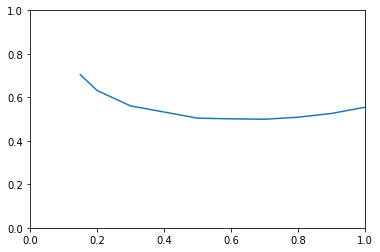

In [31]:
plt.plot(York['Load'],York['kW/Ton.R'])
plt.xlim(0,1)
plt.ylim(0,1)

In [121]:
lift_lines = pickle.load( open( "B4lift_lines.pkl", "rb" ) )


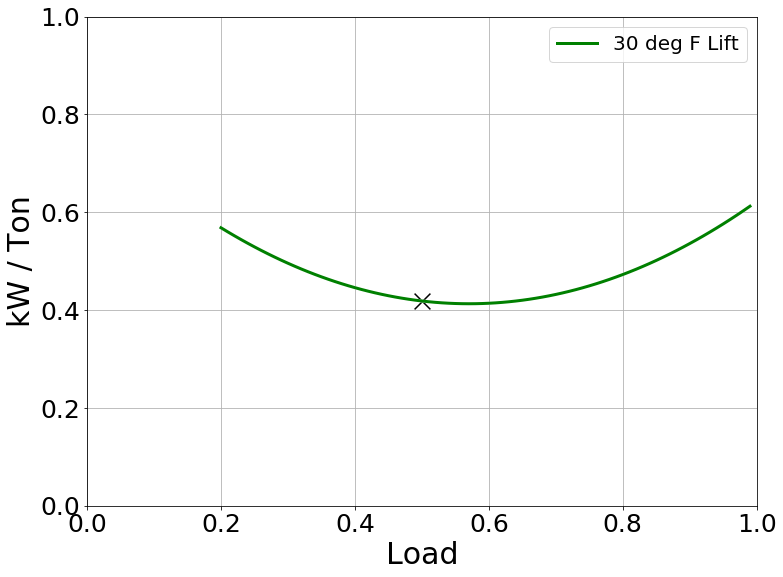

In [122]:
col_list = { 10:'blue',
             20:'red',
             30:'green',
             40:'gold',
             50:'purple'}

plt.figure(figsize=(12,9))
for key in lift_lines:
    x_line = lift_lines[key][0]
    y_line = lift_lines[key][1]
    if key == 30:
        plt.plot(x_line,y_line,c='white',linewidth=3.0)            
        plt.plot(x_line,y_line,c=col_list[key],linewidth=3.0,label=f'{key} deg F Lift')
#plt.plot(York['Load'],York['kW/Ton.R'],marker='o',color='black', label='York design, 41 deg F Lift')

plt.scatter([0.5],[0.4186], marker='x', s=250,color='black')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(fontsize=20,loc=1)

plt.xlabel('Load',size=30)
plt.ylabel('kW / Ton',size=30)
#plt.title(title, size=20)
plt.xticks(size=25)
plt.yticks(size=25)
plt.grid(True)


## Look at feature correlation

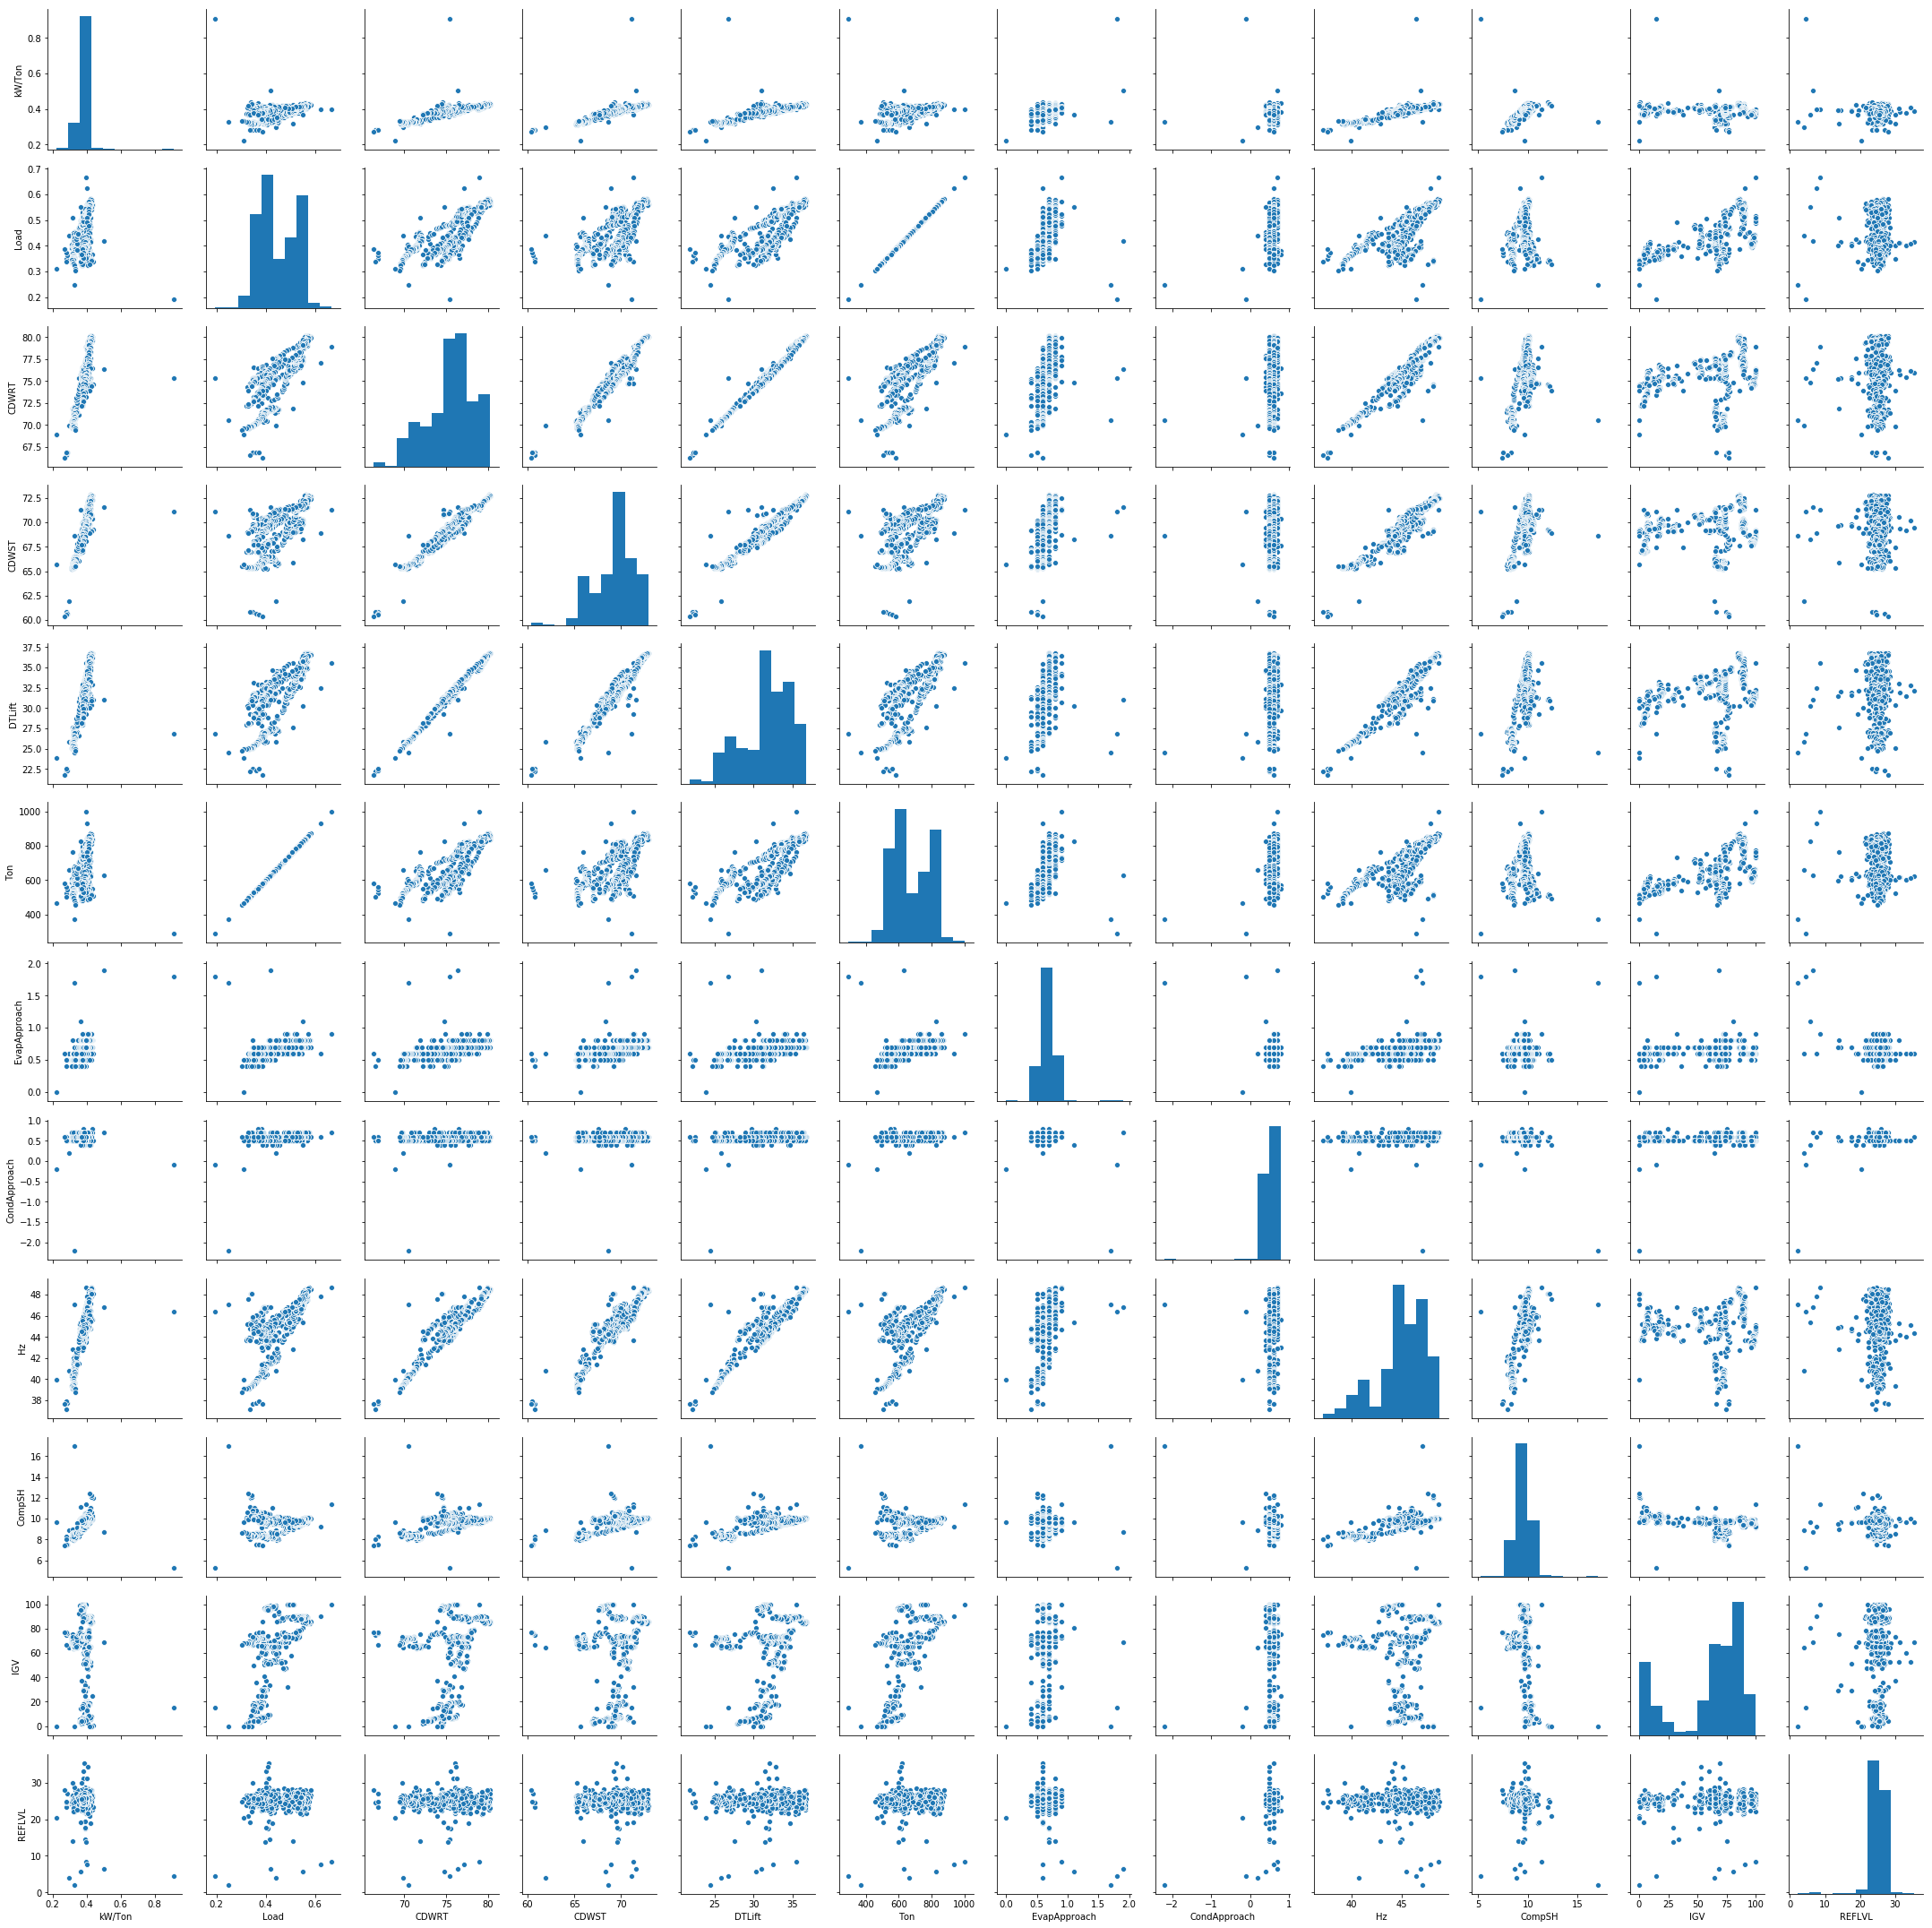

In [51]:
import seaborn as sns
sns.pairplot(Chiller1)